In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()
import warnings
warnings.filterwarnings('ignore')

# 1. Reading the Dataset to the Python Environment.

In [2]:
data_iris = pd.read_excel("iris (1).xls")
data_iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Here some details about the dataset

In [3]:
data_iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data_iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [5]:
np.mean(data_iris,axis=0)

SL    5.855944
SW    3.049306
PL    3.756250
PW    1.198667
dtype: float64

In [6]:
np.min(data_iris,axis=0)

SL                        4.3
SW                        2.0
PL                        1.0
PW                        0.1
Classification    Iris-setosa
dtype: object

In [7]:
np.max(data_iris,axis=0)

SL                           7.9
SW                           4.4
PL                           6.9
PW                           2.5
Classification    Iris-virginica
dtype: object

In [8]:
data_iris.shape

(150, 5)

In [9]:
pd.set_option('display.max_columns', None)
data_iris.groupby('Classification').describe()

SL                                                     SW  \
                count      mean       std  min    25%   50%   75%  max count   
Classification                                                                 
Iris-setosa      47.0  5.008511  0.360452  4.3  4.800  5.00  5.20  5.8  47.0   
Iris-versicolor  48.0  5.925000  0.522474  4.9  5.600  5.85  6.30  7.0  48.0   
Iris-virginica   48.0  6.616667  0.598343  5.6  6.275  6.50  6.95  7.9  49.0   

                                                                 PL            \
                     mean       std  min  25%  50%   75%  max count      mean   
Classification                                                                  
Iris-setosa      3.408511  0.390557  2.3  3.1  3.4  3.65  4.4  48.0  1.468750   
Iris-versicolor  2.781250  0.315322  2.0  2.6  2.8  3.00  3.4  48.0  4.252083   
Iris-virginica   2.967347  0.322353  2.2  2.8  3.0  3.10  3.8  48.0  5.547917   

                                                         PW                   \
                      std  min  25%   50%    75%  max count   mean       std   
Classification                                                                 
Iris-setosa      0.175228  1.0  1.4  1.50  1.600  1.9  50.0  0.244  0.107210   
Iris-versicolor  0.475345  3.0  4.0  4.35  4.600  5.1  50.0  1.326  0.197753   
Iris-virginica   0.555433  4.5  5.1  5.55  5.825  6.9  50.0  2.026  0.274650   

                                          
                 min  25%  50%  75%  max  
Classification                            
Iris-setosa      0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   1.4  1.8  2.0  2.3  2.5

In [10]:
data_iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

we can see some missing values

In [11]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The values of 4 columns i.e. the SL,SW,PL,PW has numerical values while Classification has a categorical string value

In [12]:
data_iris['Classification'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Classification, dtype: int64

In [13]:
data_iris[data_iris.duplicated()]

,SL,SW,PL,PW,Classification
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


There are duplicate value in the data set iris.

<AxesSubplot:title={'center':'Count of Classification'}, xlabel='Classification', ylabel='count'>

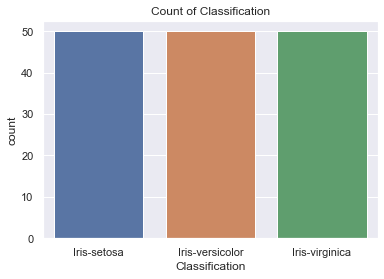

In [14]:
plt.title('Count of Classification')
sns.countplot(x=data_iris['Classification'])

# 2. Pre-processing Steps

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>,
        <AxesSubplot:title={'center':'PW'}>]], dtype=object)

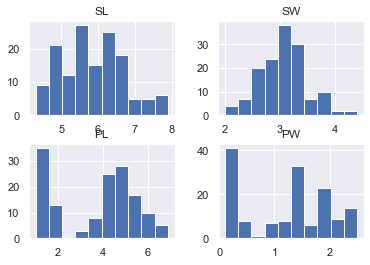

In [15]:
data_iris.hist()

In [16]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
data_iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [18]:
data_iris['SL'] = data_iris['SL'].fillna(data_iris['PL'].mean())
data_iris['SW'] = data_iris['SW'].fillna(data_iris['PL'].mean())
data_iris['PL'] = data_iris['PL'].fillna(data_iris['PL'].mean())

In [19]:
data_iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

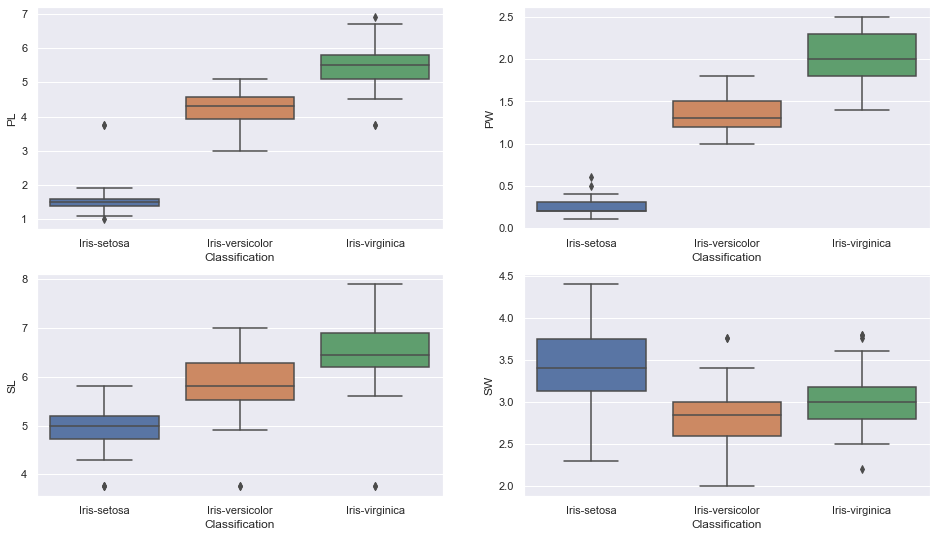

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y=data_iris['PL'], x= 'Classification', data=data_iris, orient='v' , ax=axes[0, 0])
sns.boxplot( y=data_iris['PW'], x= 'Classification', data=data_iris, orient='v' , ax=axes[0, 1])
sns.boxplot( y=data_iris['SL'], x= 'Classification', data=data_iris, orient='v' , ax=axes[1, 0])
sns.boxplot( y=data_iris['SW'], x= 'Classification', data=data_iris, orient='v' , ax=axes[1, 1])
plt.show()

In [21]:
for column in data_iris.columns[0:4]:
    for classification in data_iris["Classification"].unique():
        class_type = data_iris[data_iris["Classification"] == classification]
        Selected_column = class_type[column]
        q1 = Selected_column.quantile(0.25) # for select first quartile
        q3 = Selected_column.quantile(0.75) # for select third quartile
        iqr = q3 - q1 # this is interquartile range
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # picking outliers' indeces
        print(outlierss)
        data_iris.drop(index = outlierss, inplace=True) # dropping outliers

Int64Index([2, 21, 39], dtype='int64')
Int64Index([51, 85], dtype='int64')
Int64Index([106, 141], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([72, 98], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([22, 28, 42], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([109, 147], dtype='int64')
Int64Index([23, 43], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


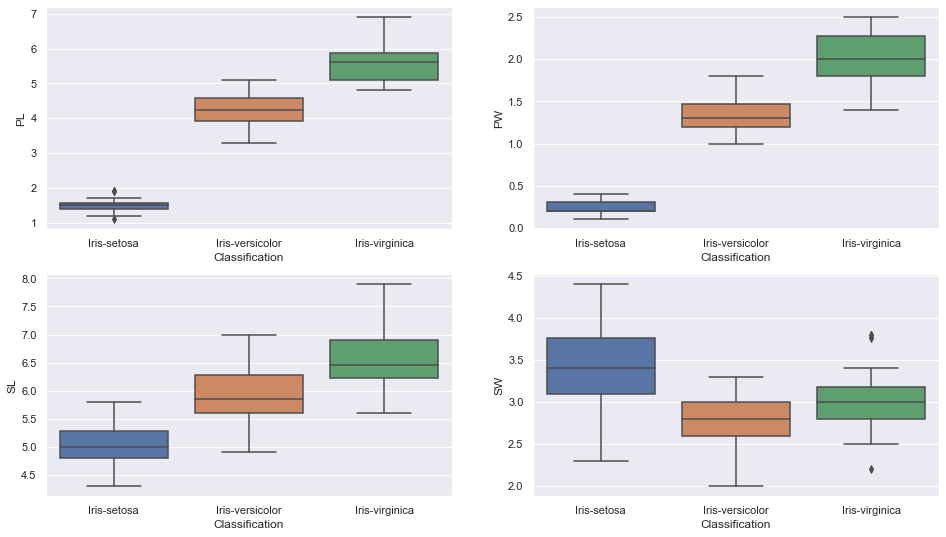

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y=data_iris['PL'], x= 'Classification', data=data_iris, orient='v' , ax=axes[0, 0])
sns.boxplot( y=data_iris['PW'], x= 'Classification', data=data_iris, orient='v' , ax=axes[0, 1])
sns.boxplot( y=data_iris['SL'], x= 'Classification', data=data_iris, orient='v' , ax=axes[1, 0])
sns.boxplot( y=data_iris['SW'], x= 'Classification', data=data_iris, orient='v' , ax=axes[1, 1])
plt.show()

The existing outliers are removed

In [23]:
data_iris.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
data_iris['Classification'] = label_en.fit_transform(data_iris['Classification'])

In [25]:
data_iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:>

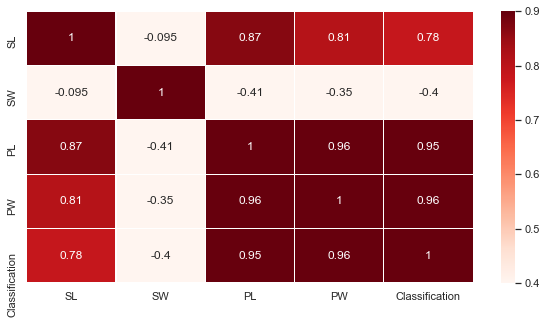

In [26]:
corrmatrix = data_iris.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidths=0.2,cmap='Reds')

In [27]:
data_iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [28]:
y = data_iris['Classification']
x = data_iris.drop('Classification',axis=1)

# Feature Engineering

In [29]:
x['mean'] = x[['SW', 'SL', 'PW', 'PL']].mean(axis = 1)
x['sum'] = x[['SW', 'SL', 'PW', 'PL']].sum(axis = 1)
x['skew'] = x[['SW', 'SL', 'PW', 'PL']].skew(axis = 1)
x['kurt'] = x[['SW', 'SL', 'PW', 'PL']].kurt(axis = 1)
x.columns

Index(['SL', 'SW', 'PL', 'PW', 'mean', 'sum', 'skew', 'kurt'], dtype='object')

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.3)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm).¶

 Logistic Regression Algorithm

In [32]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [34]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  1.0
Precision is:  1.0
Recall is:  1.0
F1 score is:  1.0


In [35]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 12]], dtype=int64)

KNN Algorithm

In [36]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred =  classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [37]:
acc_values

[0.9512195121951219,
 0.975609756097561,
 0.926829268292683,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561]

Text(0, 0.5, 'Accuracy')

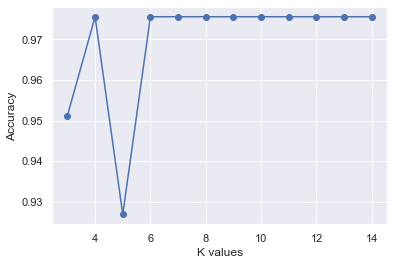

In [38]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [39]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred =  classifier.predict(x_test)   

In [40]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.926829268292683
Precision is:  0.926829268292683
Recall is:  0.926829268292683
F1 score is:  0.926829268292683


In [41]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 10,  3],
       [ 0,  0, 12]], dtype=int64)

Decision Tree Algorithm

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [43]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.9512195121951219
Precision is:  0.9512195121951219
Recall is:  0.9512195121951219
F1 score is:  0.9512195121951219


In [44]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 11]], dtype=int64)

Support Vector Machine Linear Kernel

In [45]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)

In [46]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.9512195121951219
Precision is:  0.9512195121951219
Recall is:  0.9512195121951219
F1 score is:  0.9512195121951219


In [47]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 11,  2],
       [ 0,  0, 12]], dtype=int64)

Support Vector Machine Polynomial Kernal

In [48]:
svm_poly = SVC(kernel = 'poly', degree = 3)
svm_poly.fit(x_train,y_train)
y_pred = svm_poly.predict(x_test)

In [49]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.9512195121951219
Precision is:  0.9512195121951219
Recall is:  0.9512195121951219
F1 score is:  0.9512195121951219


In [50]:
confusion_matrix(y_test,y_pred)

array([[15,  1,  0],
       [ 0, 13,  0],
       [ 0,  1, 11]], dtype=int64)

Support Vector Machine Radial Basis Function Kernal

In [51]:
svm_radial = SVC(kernel = 'rbf')
svm_radial.fit(x_train,y_train)
y_pred = svm_radial.predict(x_test)

In [52]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'micro'))

Accuracy is:  0.975609756097561
Precision is:  0.975609756097561
Recall is:  0.975609756097561
F1 score is:  0.975609756097561


In [53]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 12]], dtype=int64)

Random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [55]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'micro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'micro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'micro'))

Accuracy is:  0.975609756097561
Precision is:  0.975609756097561
Recall is:  0.975609756097561
F1 score is:  0.975609756097561


In [56]:
confusion_matrix (y_test, y_pred)

array([[16,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 12]], dtype=int64)

In [57]:
pd.Series(rf.feature_importances_, index = x.columns).sort_values(ascending=False)*100

PL      25.913749
PW      20.660519
kurt    17.521849
mean    13.863678
sum     13.143786
SL       4.865613
skew     2.258556
SW       1.772251
dtype: float64

Here we can see that logistic regression we got f value 1.0 so we can say that is overfitting and when we look at the KNN the f value is 0.92 here it is underfitting by comparing others and also the decision tree f value is 0.95 it is also small comparing others here we get the best one is  SVM rbf and random forest the f value is 0.97.